# Analyzing Movie Data through Python

# Importing Our Modules
Here we are importing pandas, matplotlib, numpy, seaborn, and sqlite3 using standard aliases:

In [205]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3

# Importing Our Data Sets
Below we are importing the data sets we have into our Jupyter Notebook.  

### Importing Our Rotten Tomatoes TSV File
Below we are importing our "Rotten Tomatoes Movie Info" TSV file into our Jupyter Notebook using pandas.  Since this is a TSV file we added in a delimiter "\t" so the data is imported into a pandas data frame correctly.

In [206]:
rt_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')

In [292]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [208]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Importing Our IMDB CSV File

Below we are importing our first IMDB data set using pandas.  With this file there is no delimiter needed since all data is separated by commas.

In [209]:
imdb_df = pd.read_csv('zippedData/tmdb.movies.csv')

In [289]:
imdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Importing Our Bom Movie Gross CSV File

Below we are importing our Bom Movie data set using pandas in a similar fashion to our IMDB CSV file.

In [211]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv')

In [290]:
# Making sure our data loaded in a clean format
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Importing Our TN Movie Budgets CSV File

Below we are importing our TN Movie Budget data set using pandas in a similar fashion to our IMDB CSV file.

In [291]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Making sure our data loaded in a clean format
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [231]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Importing Our 'IM.DB' Data
Now for the trickiest data to import: our IM.DB SQL data.  This data is housed in a SQL data base and we want this to be imported as a pandas data frame.  Below we connect to the IMDB data base, and import two tables we think are important to our queries: the "movie_basics" and "movie_ratings" tables.

In [293]:
conn = sqlite3.connect('zippedData/im.db') 
c = conn.cursor()

In [294]:
c.execute('''
          SELECT
          *
          FROM movie_basics
          
          ''')

imdb_sql_df = pd.DataFrame(c.fetchall(), columns = ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'])
imdb_sql_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [295]:
c.execute('''
          SELECT
          *
          FROM movie_ratings
          
          ''')

imdb_sql_df2 = pd.DataFrame(c.fetchall(), columns = ['movie_id', 'averagerating', 'numvotes'])
imdb_sql_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [296]:
conn.close

<function Connection.close>

# Cleaning And Exploring Our Data
Below we are going to clean our data so we can start parsing through and visualizing our data sets.

### TN Movie Budget Data
First up, after seeing the 'tn_df.info()' table above, we can see that all rows and values are not null, which is a great relief.  However, we can see that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are listed as strings.  Since we can't use strings to visualize data, we will clean them below by removing punctation and converting them from strings to integers.

In [232]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')

In [233]:
tn_df = tn_df.astype({'production_budget':'int'})
tn_df = tn_df.astype({'domestic_gross':'int'})
tn_df = tn_df.astype({'worldwide_gross':'int'})

In [301]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'], infer_datetime_format=True) 

**Return on Investment:** Below we are creating a new column titled "Return on Investment" (ROI) so we can measure the return on investment on different types of films.  Additionally, we are cleaning up our new column and dataframe by removing rows where ROI is 0.  Given that this table is telling us that ROI is "0" might tell us that this data is wrong.

In [234]:
tn_df['return_on_investment'] = (tn_df['worldwide_gross']/tn_df['production_budget'])*100

In [236]:
# Removing ROI values that are $0.
tn_df = tn_df[tn_df['return_on_investment'] != 0]

**Mapping our "TN Movie Budget" Data:** Below we are mapping our newly cleaned "TN Movie Budget" data to look through a few relationships and correlations between our 'production_budget', 'domestic_gross', 'worldwide_gross', and 'return_on_investment' columns.

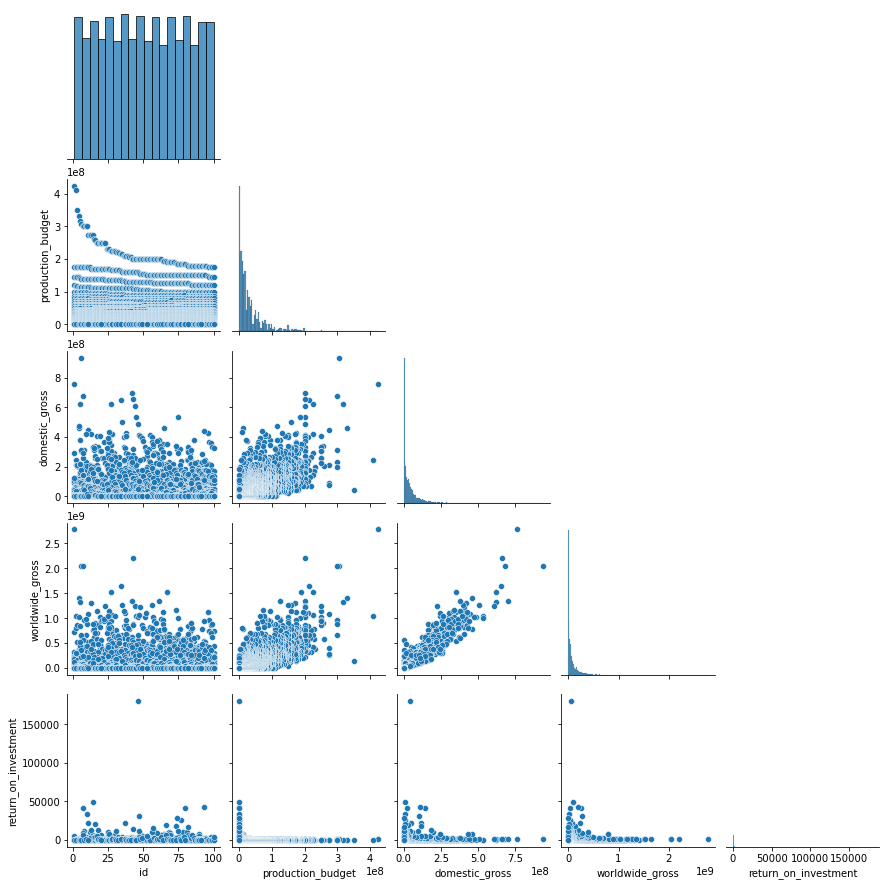

In [238]:
sns.pairplot(tn_df, corner = True)
plt.show()



**Let's investigate our first correlation!** Looking through our visualizations above, we want to further investigate the relationship between a movie's production budget and the movie's worldwide gross return.

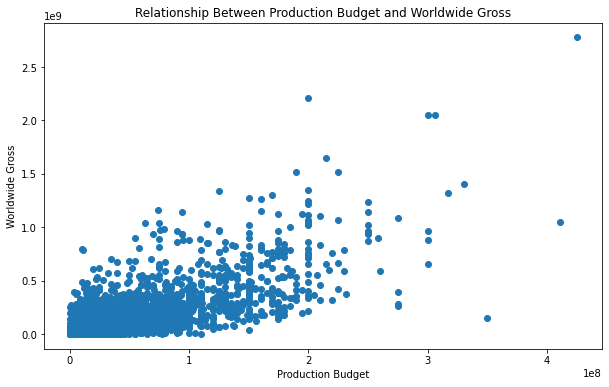

In [239]:
fig, ax = plt.subplots(figsize=(10, 6))

x = tn_df['production_budget']
y = tn_df['worldwide_gross']

ax.scatter(x,y)
ax.set_title('Relationship Between Production Budget and Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross');

Unsurprisingly, we see that the higher the production budget, the higher the worldwide gross.  Below we went a step further to investigate the correlation coefficient between the two variables and see that they are highly positively correlated with a .75 correlation coefficient!

In [240]:
corr = tn_df['production_budget'].corr(tn_df['worldwide_gross'])
corr

0.7460130477427712

**What about the correlation between production budget and return on investment?**. Below we take similar steps to the above, however we are visualizing the relationship between the amount a studio doles out for a production budget and the return on investment.

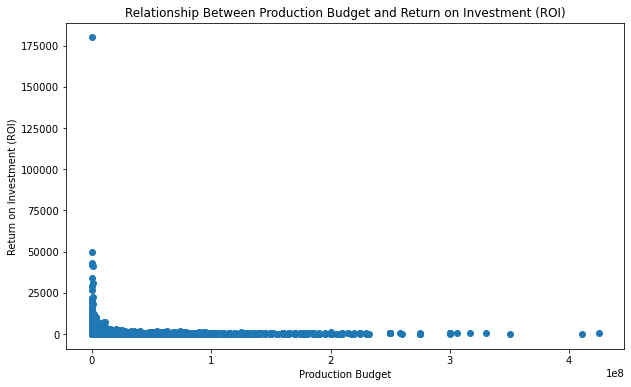

In [241]:
fig, ax = plt.subplots(figsize=(10, 6))

x = tn_df['production_budget']
y = tn_df['return_on_investment']

ax.scatter(x,y)
ax.set_title('Relationship Between Production Budget and Return on Investment (ROI)')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Return on Investment (ROI)');

It looks like there is very little correlation between a movie's production budget and the movie's return on investment.  There is actually a slight negative relationship between the two, meaning the higher the budget, the lower the expected return on investment.  However, given that the correlation coefficient is extremely close to 0, we can assume there is little to no correlation.

In [242]:
corr = tn_df['production_budget'].corr(tn_df['return_on_investment'])
corr

-0.05639103196496511

In [248]:
imdb_sql_df3 = imdb_sql_df.merge(imdb_sql_df2)

In [249]:
imdb_sql_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


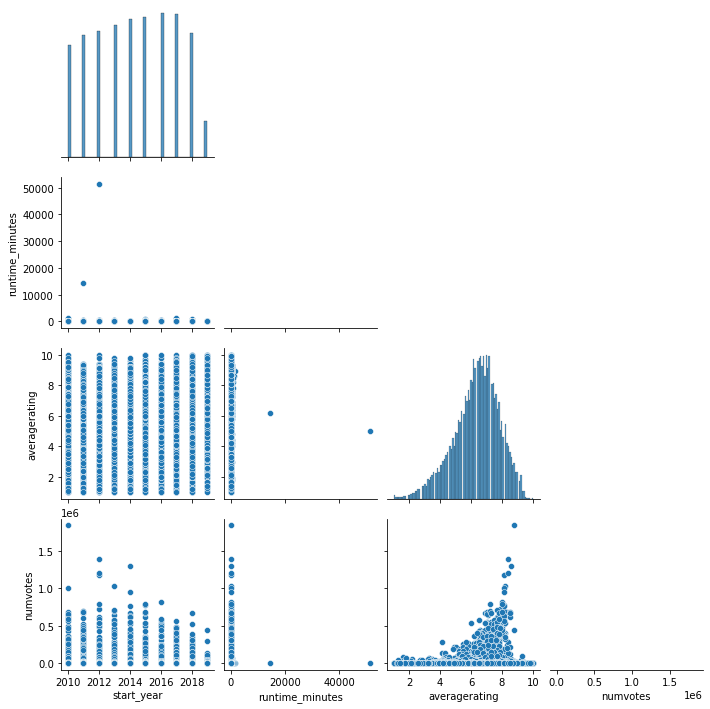

In [29]:
sns.pairplot(imdb_sql_df3, corner = True)
plt.show()

In [30]:
# We can see that there are outliers in the runtime_minutes column of our data frame.  Let's investigate

In [250]:
imdb_sql_df4 = imdb_sql_df3.dropna()

In [251]:
imdb_sql_df4.sort_values('runtime_minutes').tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
71479,tt8690764,"Silence not silence, red not red, live not live","Silence not silence, red not red, live not live",2018,601.0,Drama,8.6,22
53649,tt5375100,Paint Drying,Paint Drying,2016,607.0,Documentary,9.3,218
53646,tt5374716,Chamisso's Shadow,Chamissos Schatten,2016,720.0,Documentary,7.8,19
20818,tt2261469,Double Fine Adventure,Double Fine Adventure,2015,724.0,Documentary,8.5,59
67287,tt7528992,Europa: The Last Battle,Europa: The Last Battle,2017,746.0,Documentary,8.2,162
72424,tt9047474,La flor,La flor,2018,808.0,"Drama,Fantasy,Musical",8.5,100
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,"Comedy,History",8.6,5
15171,tt2008009,The Clock,The Clock,2010,1440.0,Drama,8.9,219
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,6.2,69
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


In [252]:
# Strangely, after some research, it looks like both Modern Times Forever and Logistics are both films that are
# actually that long.  Since we won't be using these values at this time, I'll be leaving this alone.

In [253]:
imdb_sql_df3 = imdb_sql_df3.dropna(subset=['genres'])
imdb_sql_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


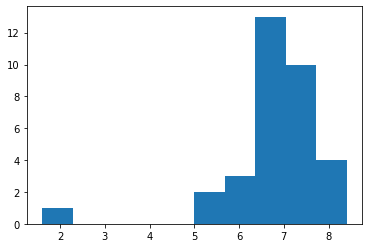

In [279]:
# Let's plot a few histograms to see what we think is best to measure the average of this data.
plt.hist(genre_money_df[genre_money_df['genres'].str.contains("Documentary")]['averagerating'])
plt.show() 

In [298]:
# Finding median rating by genre.  We are using median because, after looking at a few histograms of the distribution,
# we believe the mean would skew data based on outliers
# The below code gives us the average of all average ratings where the "genres" column of our database contains a
# string containing a genre we are interested in.
doc_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Documentary")]['averagerating'].median()
drama_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Drama")]['averagerating'].median()
horror_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Horror")]['averagerating'].median()
comedy_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Comedy")]['averagerating'].median()
history_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("History")]['averagerating'].median()
fantasy_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Fantasy")]['averagerating'].median()
animation_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Animation")]['averagerating'].median()
scifi_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Sci-Fi")]['averagerating'].median()
action_ave = imdb_sql_df3[imdb_sql_df3['genres'].str.contains("Action")]['averagerating'].median()

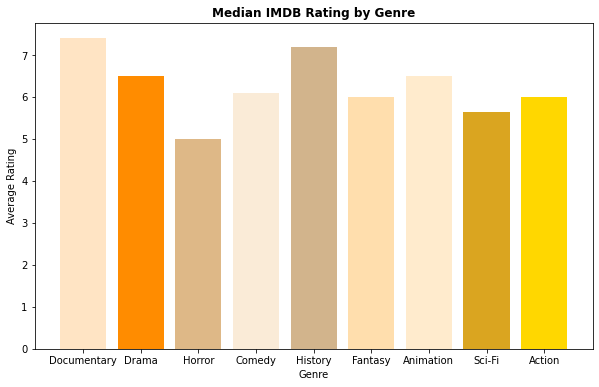

In [284]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       [doc_ave, drama_ave, horror_ave, comedy_ave, history_ave, fantasy_ave, animation_ave, scifi_ave, action_ave],
      color=['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'goldenrod', 'gold'])

# Labels
ax.set_title('Median IMDB Rating by Genre', fontweight="bold")
ax.set_xlabel('Genre')
ax.set_ylabel('Average Rating');

In [258]:
im_db = imdb_sql_df3.rename(columns={'primary_title': 'movie'})

In [259]:
genre_money_df = pd.merge(im_db, tn_df, on ='movie')

In [260]:
genre_money_df

,movie_id,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,return_on_investment
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",45000000,0,73706,0.163791
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",25000000,720828,9313302,37.253208
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",25000000,720828,9313302,37.253208
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",25000000,720828,9313302,37.253208
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",91000000,58236838,187861183,206.440860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,tt8680254,Richard III,Richard III,2016,NaN,Drama,9.1,28,65,"Dec 29, 1995",9200000,2684904,4199334,45.644935
2588,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",400000,655538,655538,163.884500
2589,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",38000000,31811527,49678401,130.732634
2590,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",6000000,18107621,18107621,301.793683


In [261]:
genre_money_df['year'] = genre_money_df['release_date'].str[-4:]

In [262]:
genre_money_df['year'] = genre_money_df['year'].astype(int)

In [263]:
# Here I am removing rows where the years don't match from the merging of the two databases.  I noticed there were a
# number of movies where one database mentioned it was one year and the other mentioned another year.  I read this to
# mean the merging of the two databases resulted in different movies with the same titled being linked.  We want to 
# drop these.
genre_money_df = genre_money_df[genre_money_df['start_year'] == genre_money_df['year']]

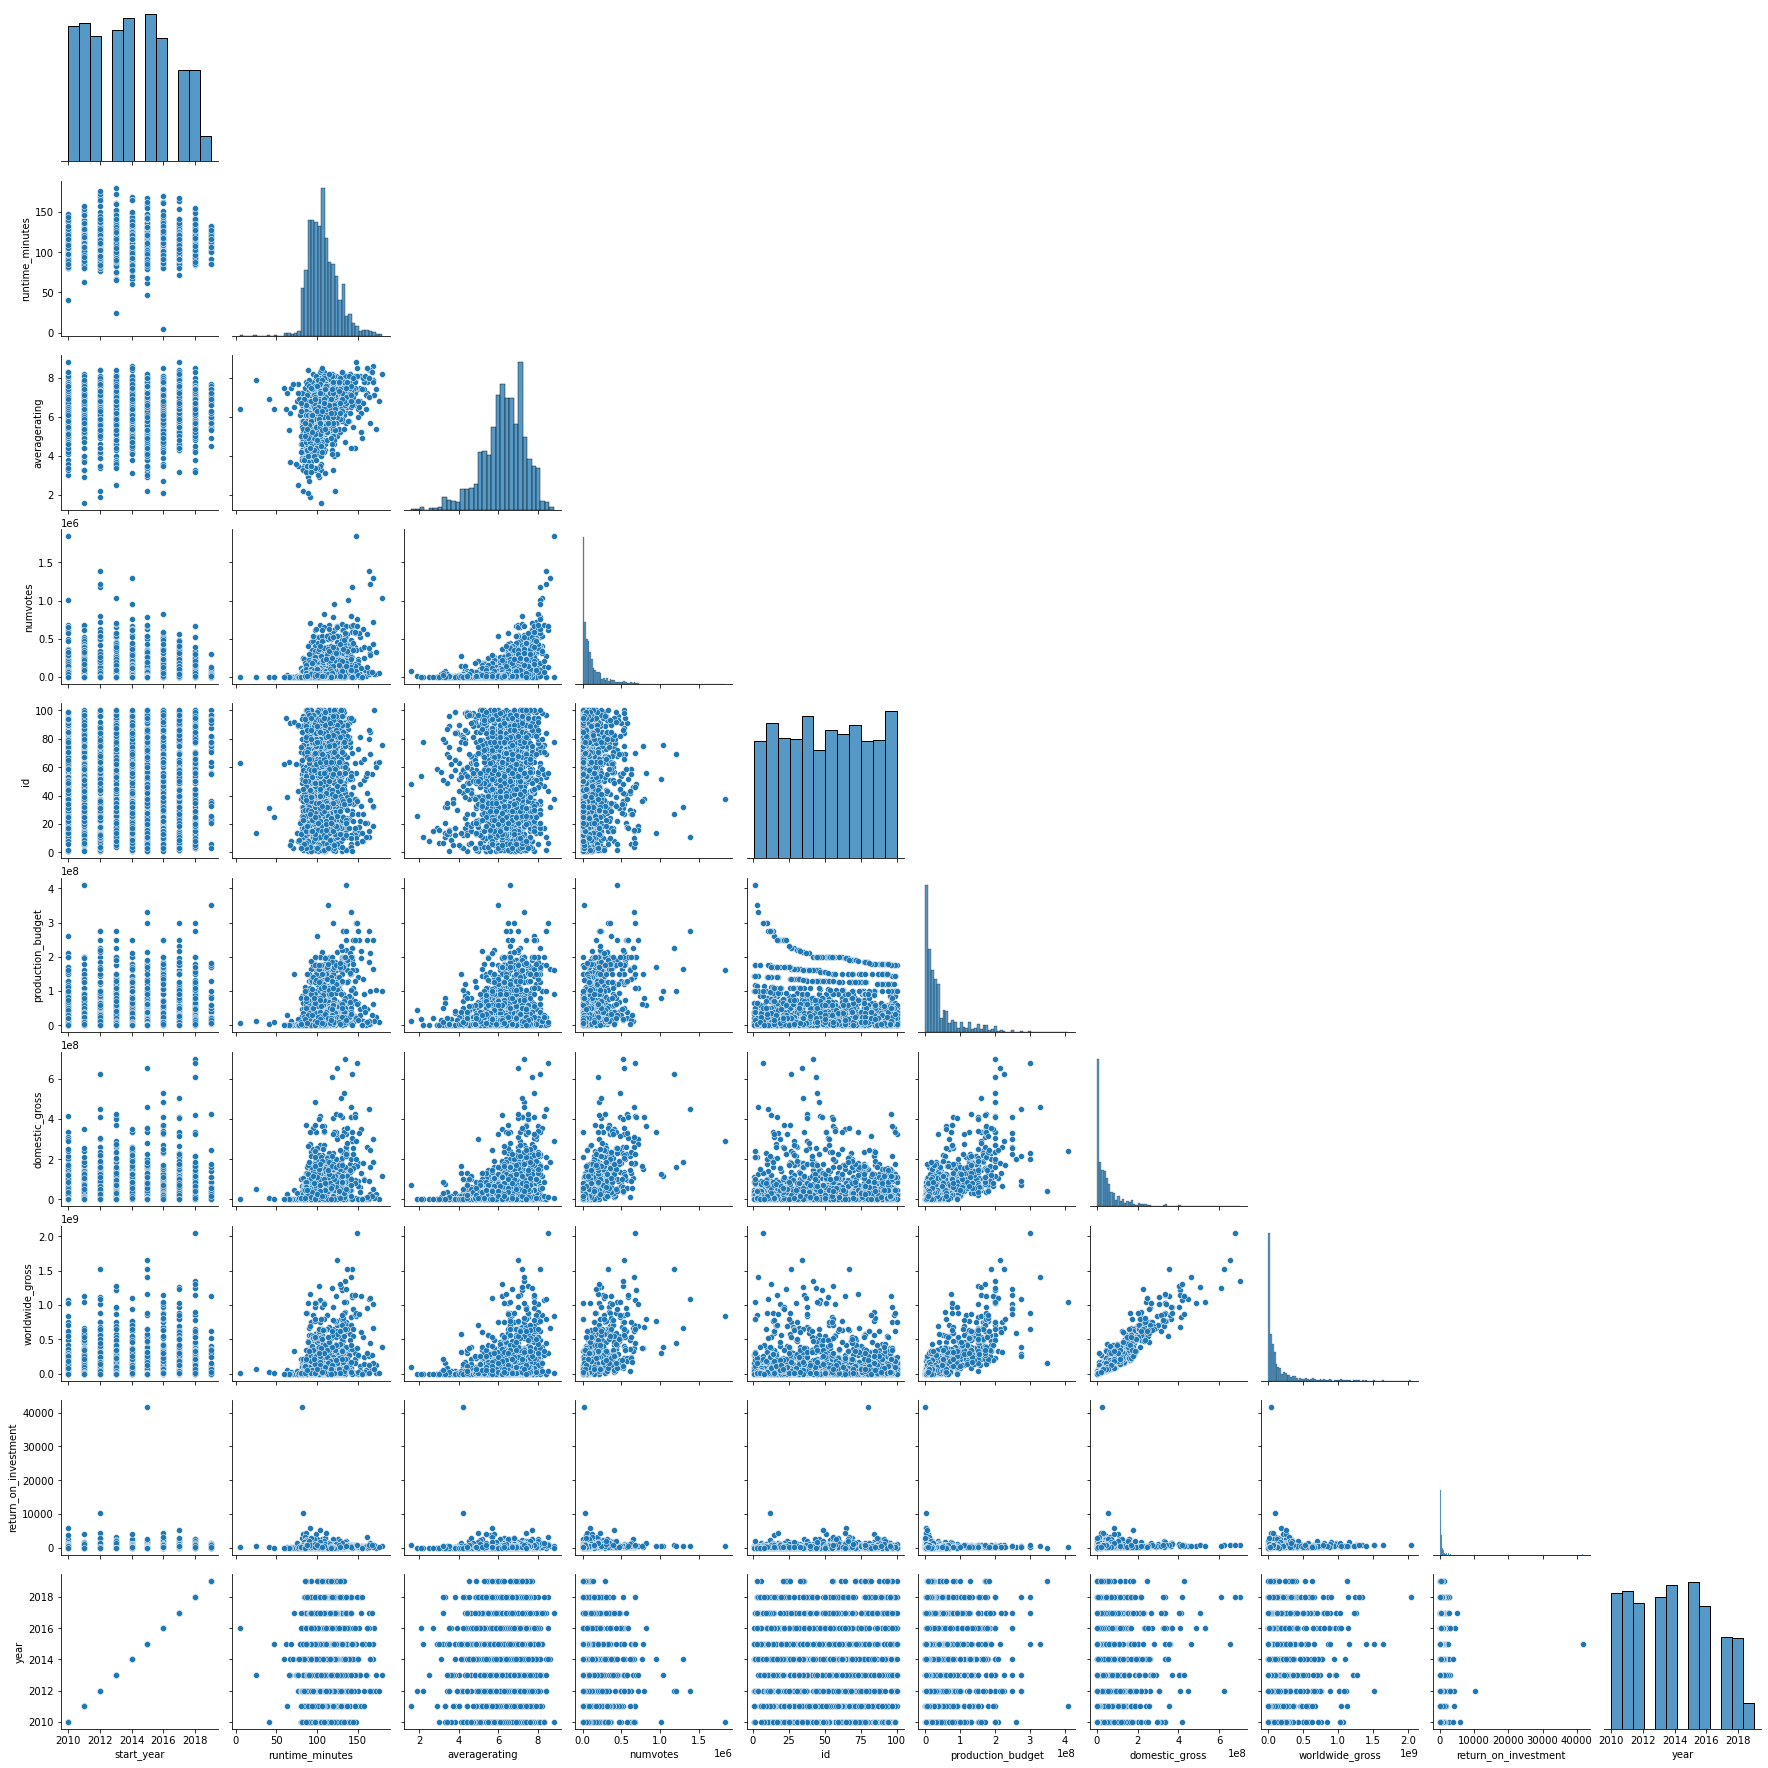

In [115]:
sns.pairplot(genre_money_df, corner = True)
plt.show()

In [286]:
# Finding average return on investment by genre
# I am using the median to account for outliers in the data
doc_ROI = genre_money_df[genre_money_df['genres'].str.contains("Documentary")]['return_on_investment'].median()
drama_ROI = genre_money_df[genre_money_df['genres'].str.contains("Drama")]['return_on_investment'].median()
horror_ROI = genre_money_df[genre_money_df['genres'].str.contains("Horror")]['return_on_investment'].median()
comedy_ROI = genre_money_df[genre_money_df['genres'].str.contains("Comedy")]['return_on_investment'].median()
history_ROI = genre_money_df[genre_money_df['genres'].str.contains("History")]['return_on_investment'].median()
fantasy_ROI = genre_money_df[genre_money_df['genres'].str.contains("Fantasy")]['return_on_investment'].median()
animation_ROI = genre_money_df[genre_money_df['genres'].str.contains("Animation")]['return_on_investment'].median()
scifi_ROI = genre_money_df[genre_money_df['genres'].str.contains("Sci-Fi")]['return_on_investment'].median()
action_ROI = genre_money_df[genre_money_df['genres'].str.contains("Action")]['return_on_investment'].median()

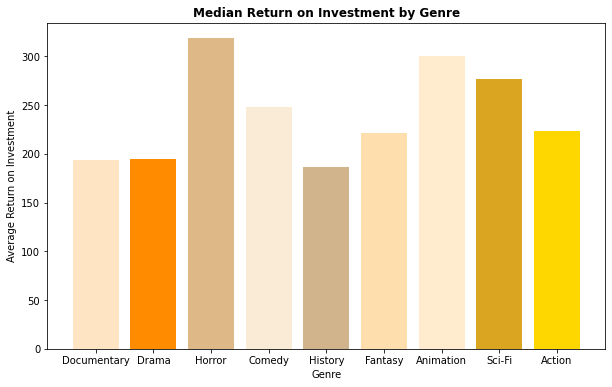

In [288]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['Documentary', 'Drama', 'Horror', 'Comedy', 'History', 'Fantasy', 'Animation', 'Sci-Fi', 'Action'], 
       [doc_ROI, drama_ROI, horror_ROI, comedy_ROI, history_ROI, fantasy_ROI, animation_ROI, scifi_ROI, action_ROI],
      color=['bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan', 'navajowhite', 'blanchedalmond', 'goldenrod', 'gold'])

# Labels
ax.set_title('Median Return on Investment by Genre', fontweight="bold")
ax.set_xlabel('Genre')
ax.set_ylabel('Average Return on Investment');

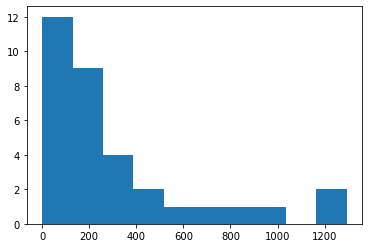

In [271]:
plt.hist(genre_money_df[genre_money_df['genres'].str.contains("Documentary")]['return_on_investment'])
plt.show() 